Q1. What is Min-Max scaling, and how is it used in data preprocessing? Provide an example to illustrate its 
application.

ANS:
Min-Max scaling, also known as normalization, is a data preprocessing technique used to scale the features of a dataset to a fixed range, usually [0, 1] or [-1, 1]. This scaling helps in bringing all the features to the same scale, which can improve the performance of machine learning algorithms, especially those sensitive to the magnitude of data,

In [19]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Creating a sample dataset
data = {
    'Feature1': [10, 20, 30, 40, 50],
    'Feature2': [100, 200, 300, 400, 500]
}

# Converting the dictionary to a pandas DataFrame
df = pd.DataFrame(data)
print("Original Data:\n", df)

# Initialize the MinMaxScaler with the desired feature range
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler to the data and transform the data
scaled_data = scaler.fit_transform(df)

# Converting the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
print("\nScaled Data:\n", scaled_df)


Original Data:
    Feature1  Feature2
0        10       100
1        20       200
2        30       300
3        40       400
4        50       500

Scaled Data:
    Feature1  Feature2
0      0.00      0.00
1      0.25      0.25
2      0.50      0.50
3      0.75      0.75
4      1.00      1.00



Q2. What is the Unit Vector technique in feature scaling, and how does it differ from Min-Max scaling? 
Provide an example to illustrate its application.



In [20]:
from sklearn.preprocessing import normalize

# Apply Unit Vector Scaling (L2 norm)
scaled_data1 = normalize(df, norm='l2')

# Converting the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data1, columns=df.columns)
print("\nUnit Vector Scaled Data:\n", scaled_df)



Unit Vector Scaled Data:
    Feature1  Feature2
0  0.099504  0.995037
1  0.099504  0.995037
2  0.099504  0.995037
3  0.099504  0.995037
4  0.099504  0.995037


Q3. What is PCA (Principle Component Analysis), and how is it used in dimensionality reduction? Provide an 
example to illustrate its application.

ANS:
Principal Component Analysis (PCA) is a statistical technique used for dimensionality reduction while preserving as much variability as possible in the dataset. It transforms the original features into a new set of uncorrelated features called principal components, which are ordered by the amount of variance they capture from the data. The first principal component captures the most variance, the second captures the second most, and so on.

How PCA Works
Standardize the Data: Mean-center and scale the data to have a mean of 0 and a standard deviation of 1.
Compute the Covariance Matrix: Calculate the covariance matrix to understand how variables in the dataset relate to each other.
Compute Eigenvalues and Eigenvectors: Derive the eigenvalues and eigenvectors of the covariance matrix. The eigenvectors represent the directions of maximum variance (principal components), and the eigenvalues represent the magnitude of these variances.
Sort Eigenvectors: Order the eigenvectors by their corresponding eigenvalues in descending order.
Project the Data: Transform the original data onto the new subspace created by the top k eigenvectors, where k is the desired number of dimensions.

Original Data:
    Feature1  Feature2
0       2.5       2.4
1       0.5       0.7
2       2.2       2.9
3       1.9       2.2
4       3.1       3.0
5       2.3       2.7
6       2.0       1.6
7       1.0       1.1
8       1.5       1.6
9       1.1       0.9

PCA Result:
    Principal Component 1  Principal Component 2
0               1.086432              -0.223524
1              -2.308937               0.178081
2               1.241919               0.501509
3               0.340782               0.169919
4               2.184290              -0.264758
5               1.160739               0.230481
6              -0.092605              -0.453317
7              -1.482108               0.055667
8              -0.567226               0.021305
9              -1.563287              -0.215361


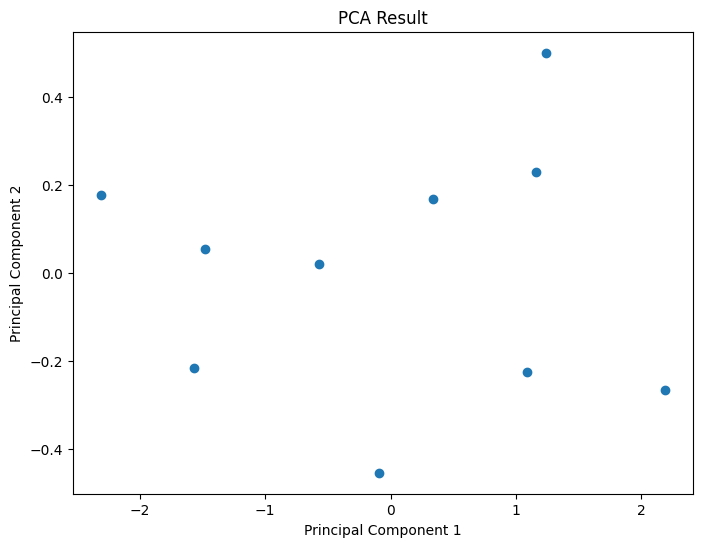

In [14]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Creating a sample dataset
data = {
    'Feature1': [2.5, 0.5, 2.2, 1.9, 3.1, 2.3, 2.0, 1.0, 1.5, 1.1],
    'Feature2': [2.4, 0.7, 2.9, 2.2, 3.0, 2.7, 1.6, 1.1, 1.6, 0.9]
}

# Converting the dictionary to a pandas DataFrame
df = pd.DataFrame(data)
print("Original Data:\n", df)

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Initialize PCA with the number of components to keep
pca = PCA(n_components=2)

# Fit and transform the data
pca_result = pca.fit_transform(scaled_data)

# Converting the PCA results back to a DataFrame
pca_df = pd.DataFrame(pca_result, columns=['Principal Component 1', 'Principal Component 2'])
print("\nPCA Result:\n", pca_df)

# Plotting the PCA result
plt.figure(figsize=(8,6))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result')
plt.show()


Q4. What is the relationship between PCA and Feature Extraction, and how can PCA be used for Feature 
Extraction? Provide an example to illustrate this concept.

ANS:
##  the relationship between PCA and Feature 
Feature extraction is a process of transforming the original features into a new set of features that are typically lower-dimensional and more informative. PCA (Principal Component Analysis) is one of the most popular techniques for feature extraction.

Key Points:
Dimensionality Reduction: PCA reduces the number of features (dimensionality) by transforming the original features into a smaller set of new features called principal components.
Variance Preservation: PCA ensures that the new features capture the maximum variance from the original data, preserving the most important information.
Uncorrelated Features: The principal components are uncorrelated, which can improve the performance of many machine learning algorithms.\

## How PCA is Used for Feature Extraction
Standardize the Data: Standardize the dataset to have a mean of 0 and a standard deviation of 1.
Compute the Covariance Matrix: Calculate the covariance matrix of the standardized data.
Compute Eigenvalues and Eigenvectors: Derive the eigenvalues and eigenvectors of the covariance matrix.
Sort and Select Components: Sort the eigenvectors by their corresponding eigenvalues in descending order and select the top k eigenvectors.
Transform Data: Project the original data onto the selected principal components to form the new feature set.

Original Data:
    Feature1  Feature2  Feature3
0       2.5       2.4       3.0
1       0.5       0.7       2.1
2       2.2       2.9       4.5
3       1.9       2.2       3.3
4       3.1       3.0       4.2
5       2.3       2.7       3.9
6       2.0       1.6       2.2
7       1.0       1.1       2.7
8       1.5       1.6       3.1
9       1.1       0.9       2.5

PCA Result:
    Principal Component 1  Principal Component 2
0               0.787365              -0.795366
1              -2.656201               0.274681
2               2.004004               0.853152
3               0.393764               0.041545
4               2.550592              -0.249240
5               1.502128               0.211851
6              -0.765517              -1.044469
7              -1.547057               0.360569
8              -0.505034               0.252679
9              -1.764044               0.094597

Explained Variance Ratio:
 [0.89848823 0.09461243]


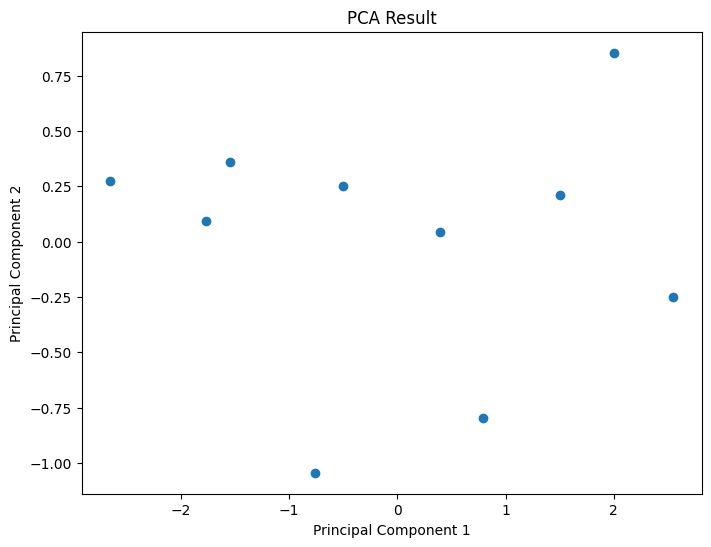

In [15]:

# Creating a sample dataset
data = {
    'Feature1': [2.5, 0.5, 2.2, 1.9, 3.1, 2.3, 2.0, 1.0, 1.5, 1.1],
    'Feature2': [2.4, 0.7, 2.9, 2.2, 3.0, 2.7, 1.6, 1.1, 1.6, 0.9],
    'Feature3': [3.0, 2.1, 4.5, 3.3, 4.2, 3.9, 2.2, 2.7, 3.1, 2.5]
}

# Converting the dictionary to a pandas DataFrame
df = pd.DataFrame(data)
print("Original Data:\n", df)

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Initialize PCA with the number of components to extract
pca = PCA(n_components=2)

# Fit PCA on the standardized data and transform the data
pca_result = pca.fit_transform(scaled_data)

# Converting the PCA results back to a DataFrame
pca_df = pd.DataFrame(pca_result, columns=['Principal Component 1', 'Principal Component 2'])
print("\nPCA Result:\n", pca_df)

# Explained variance
explained_variance = pca.explained_variance_ratio_
print("\nExplained Variance Ratio:\n", explained_variance)

# Plotting the PCA result
plt.figure(figsize=(8,6))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result')
plt.show()


Q5. You are working on a project to build a recommendation system for a food delivery service. The dataset 
contains features such as price, rating, and delivery time. Explain how you would use Min-Max scaling to 
preprocess the data.

ANS:
When building a recommendation system for a food delivery service, it's important to preprocess the data to ensure that the features are on a similar scale. This helps improve the performance of many machine learning algorithms. Here’s how you can use Min-Max scaling to preprocess features like price, rating, and delivery time.

Uniform Scale: Min-Max scaling transforms the features to a common scale, typically [0, 1], without distorting differences in the ranges of values.

Algorithm Compatibility: Many machine learning algorithms, especially those based on distance (like k-NN) or gradient descent (like neural networks), perform better when features are on a similar scale.





In [16]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Creating a sample dataset
data = {
    'price': [5.99, 7.99, 8.49, 12.99, 10.99],
    'rating': [4.2, 4.5, 3.9, 4.7, 4.3],
    'delivery_time': [30, 25, 45, 20, 35]
}

# Converting the dictionary to a pandas DataFrame
df = pd.DataFrame(data)
print("Original Data:\n", df)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(df)

# Converting the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
print("\nScaled Data:\n", scaled_df)


Original Data:
    price  rating  delivery_time
0   5.99     4.2             30
1   7.99     4.5             25
2   8.49     3.9             45
3  12.99     4.7             20
4  10.99     4.3             35

Scaled Data:
       price  rating  delivery_time
0  0.000000   0.375            0.4
1  0.285714   0.750            0.2
2  0.357143   0.000            1.0
3  1.000000   1.000            0.0
4  0.714286   0.500            0.6


Q6. You are working on a project to build a model to predict stock prices. The dataset contains many 
features, such as company financial data and market trends. Explain how you would use PCA to reduce the 
dimensionality of the dataset.

ANS:

When working on a project to predict stock prices using a dataset with many features, such as company financial data and market trends, it can be beneficial to reduce the dimensionality of the dataset. This helps in improving the model’s performance and reducing overfitting. PCA (Principal Component Analysis) is an effective technique for this purpose.

# Step-by-Step Process for Using PCA
## Understand the Data:

The dataset includes multiple features such as various financial metrics, market indicators, and possibly historical stock prices.

## Why PCA?:

Dimensionality Reduction: PCA helps reduce the number of features while retaining the most important information.

Variance Preservation: PCA transforms the features into a new set of uncorrelated features that capture the maximum variance in the data.

Improved Model Performance: Reducing dimensionality can help in building more efficient and less complex models.

Original Data:
    feature1  feature2  feature3  feature4  feature5
0  0.385527  0.948171  0.743920  0.567328  0.517224
1  0.999795  0.485433  0.683921  0.836341  0.974345
2  0.509896  0.840974  0.821599  0.468420  0.310078
3  0.062284  0.947290  0.132211  0.556482  0.605540
4  0.221136  0.403858  0.267639  0.836155  0.356865

Standardized Data:
    feature1  feature2  feature3  feature4  feature5
0 -0.423549  1.692971  1.008781  0.352485 -0.093976
1  1.815688  0.086970  0.791940  1.300982  1.637729
2  0.029823  1.320930  1.289518  0.003752 -0.878701
3 -1.601888  1.689913 -1.201980  0.314246  0.240592
4 -1.022816 -0.196147 -0.712535  1.300323 -0.701460

PCA Result:
           0         1         2         3         4
0  1.333454 -1.175810 -0.494563 -0.044373  0.888296
1 -0.185110  0.589805  0.382196  2.027490  1.915004
2  1.109572 -1.120239 -1.240296  0.315013  0.238915
3  0.745837 -0.576413  0.471764 -2.221776  0.987860
4 -1.184731 -1.093451  0.194351 -1.028722  0.282765

Explained Va

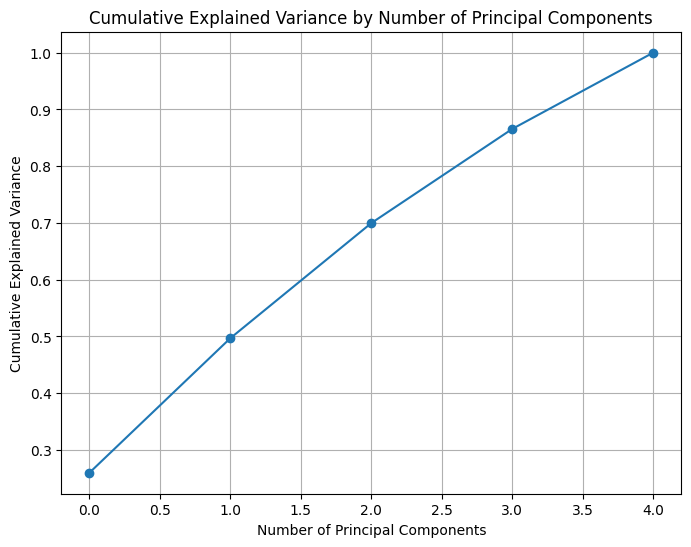

In [17]:

# Load the dataset
# Assuming a CSV file 'stock_data.csv' with multiple financial and market features
# df = pd.read_csv('stock_data.csv')

# Example data creation for illustration purposes
data = {
    'feature1': np.random.rand(100),
    'feature2': np.random.rand(100),
    'feature3': np.random.rand(100),
    'feature4': np.random.rand(100),
    'feature5': np.random.rand(100)
}
df = pd.DataFrame(data)

print("Original Data:\n", df.head())

# Standardizing the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
print("\nStandardized Data:\n", pd.DataFrame(scaled_data, columns=df.columns).head())

# Initialize PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance

# Fit and transform the standardized data
pca_result = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(pca_result)
print("\nPCA Result:\n", pca_df.head())

# Explained variance
explained_variance = pca.explained_variance_ratio_
print("\nExplained Variance Ratio:\n", explained_variance)

# Cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)
print("\nCumulative Explained Variance:\n", cumulative_variance)

# Plot the cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Number of Principal Components')
plt.grid(True)
plt.show()


Q7. For a dataset containing the following values: [1, 5, 10, 15, 20], perform Min-Max scaling to transform the 
values to a range of -1 to 1.


In [12]:
df=pd.DataFrame([1, 5, 10, 15, 20])

sxaler=MinMaxScaler(feature_range=(-1,1))
data=sxaler.fit_transform(df)
print(data)
# com=nvert back to dataframe
df=pd.DataFrame(data)
print(df)



[[-1.        ]
 [-0.57894737]
 [-0.05263158]
 [ 0.47368421]
 [ 1.        ]]
          0
0 -1.000000
1 -0.578947
2 -0.052632
3  0.473684
4  1.000000


Q8. For a dataset containing the following features: [height, weight, age, gender, blood pressure], perform 
Feature Extraction using PCA. How many principal components would you choose to retain, and why?

ANS

To perform feature extraction using PCA on a dataset containing the features [height, weight, age, gender, blood pressure], we would follow these steps:

## Standardize the Data: 
It's essential to standardize the dataset so that each feature has a mean of 0 and a standard deviation of 1.

## Apply PCA:
Use PCA to reduce the dimensionality of the dataset.

## Determine the Number of Principal Components: 
Analyze the explained variance to decide how many principal components to retain.

Original Data:
    height  weight  age  gender  blood_pressure
0     170      65   25       1             120
1     160      60   32       0             110
2     180      80   45       1             130
3     175      75   22       1             115
4     165      70   38       0             125
5     172      68   29       1             118
6     178      78   40       1             135
7     185      85   50       1             140
8     168      64   36       0             112
9     174      72   31       0             122

Standardized Data:
      height    weight       age    gender  blood_pressure
0 -0.385675 -0.900079 -1.180123  0.816497       -0.288791
1 -1.814101 -1.571780 -0.337178 -1.224745       -1.358386
2  1.042751  1.115023  1.228292  0.816497        0.780804
3  0.328538  0.443323 -1.541386  0.816497       -0.823588
4 -1.099888 -0.228378  0.385346 -1.224745        0.246007
5 -0.099990 -0.497059 -0.698440  0.816497       -0.502710
6  0.757066  0.846343  0.626188  0.81649

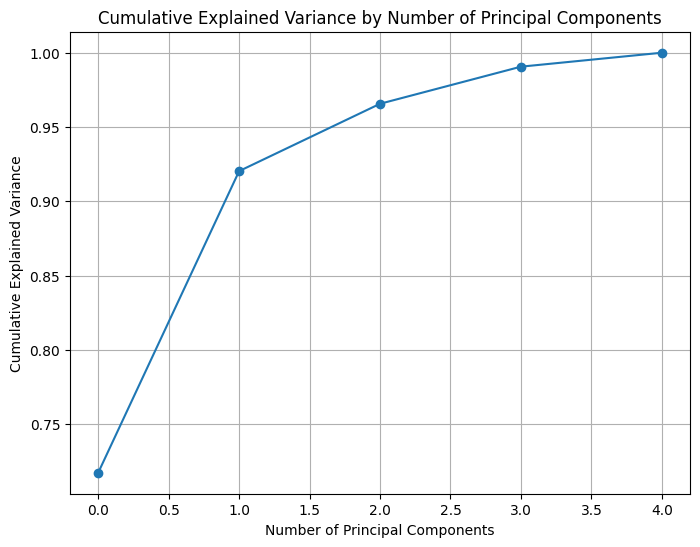

In [18]:

# Creating a sample dataset
data = {
    'height': [170, 160, 180, 175, 165, 172, 178, 185, 168, 174],
    'weight': [65, 60, 80, 75, 70, 68, 78, 85, 64, 72],
    'age': [25, 32, 45, 22, 38, 29, 40, 50, 36, 31],
    'gender': [1, 0, 1, 1, 0, 1, 1, 1, 0, 0],  # 1 for male, 0 for female
    'blood_pressure': [120, 110, 130, 115, 125, 118, 135, 140, 112, 122]
}

# Converting the dictionary to a pandas DataFrame
df = pd.DataFrame(data)
print("Original Data:\n", df)

# Standardizing the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
print("\nStandardized Data:\n", pd.DataFrame(scaled_data, columns=df.columns))

# Initialize PCA
pca = PCA()

# Fit PCA on the standardized data
pca_result = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(len(df.columns))])
print("\nPCA Result:\n", pca_df)

# Explained variance
explained_variance = pca.explained_variance_ratio_
print("\nExplained Variance Ratio:\n", explained_variance)

# Cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)
print("\nCumulative Explained Variance:\n", cumulative_variance)

# Plot the cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Number of Principal Components')
plt.grid(True)
plt.show()
